In [19]:
library(ggplot2)
library(MASS)
library(data.table)
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

In [20]:
##chap introduction
head(mammals,8)

,body,brain
Arctic fox,3.385,44.5
Owl monkey,0.480,15.5
Mountain beaver,1.350,8.1
Cow,465.000,423.0
Grey wolf,36.330,119.5
Goat,27.660,115.0
Roe deer,14.830,98.2
Guinea pig,1.040,5.5


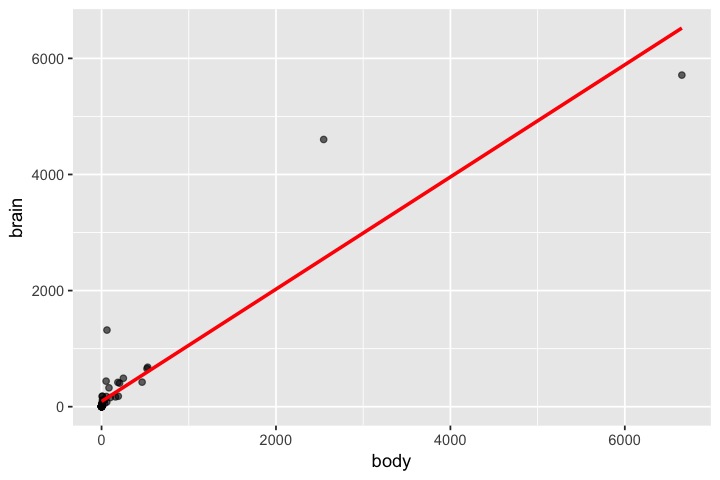

In [21]:
ggplot(data=mammals,aes(x=body,y=brain)) +
    geom_point(alpha=0.6) +
    stat_smooth(method="lm",col="red",se=F) #bad lm from outliers

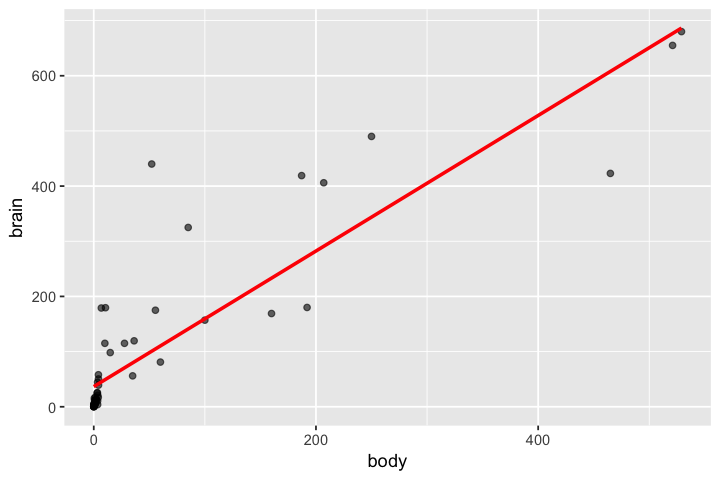

In [22]:
dtm<-data.table(mammals)

ggplot(data=dtm[body<2000 &brain<1000,],aes(x=body,y=brain)) +
    geom_point(alpha=0.6) +
    stat_smooth(method="lm",col="red",se=F) #filter out outliers

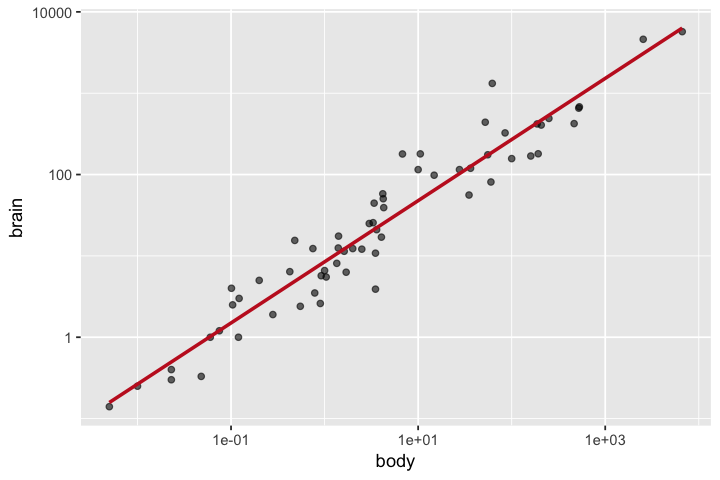

In [23]:
#how scaling of variables can help
ggplot(data=mammals,aes(x=body,y=brain)) +
    geom_point(alpha=0.6) +
    scale_x_log10() +
    scale_y_log10() +
    stat_smooth(method="lm",col="#C42126",se=F, size=1) 

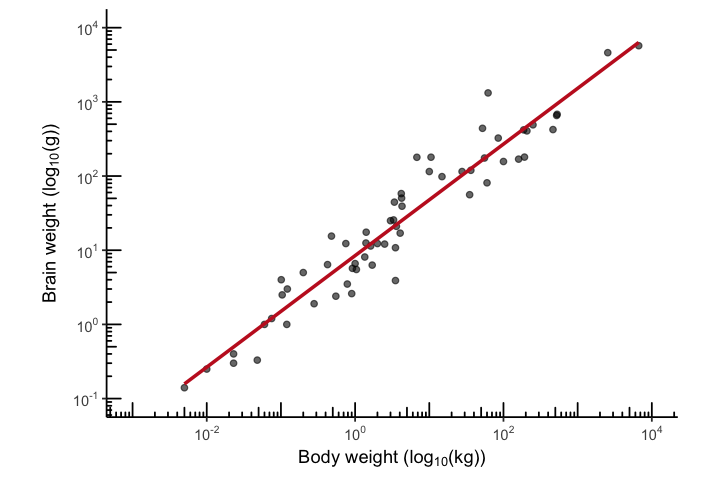

In [35]:
#the same publication ready plot
library(scales)
ggplot(data=mammals,aes(x=body,y=brain)) +
    annotation_logticks() +
    geom_point(alpha=0.6) +
    coord_fixed(xlim=c(10^-3,10^4), ylim=c(10^-1,10^4))+
    scale_x_log10(expression("Body weight (log"["10"]*"(kg))"),
                 breaks = trans_breaks("log10",function(x) 10^x),
                 labels = trans_format("log10",math_format(10^.x))) +
    scale_y_log10(expression("Brain weight (log"["10"]*"(g))"),
                 breaks = trans_breaks("log10",function(x) 10^x),
                 labels = trans_format("log10",math_format(10^.x))) + 
    stat_smooth(method="lm",col="#C42126",se=F, size=1)+
    theme_classic()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


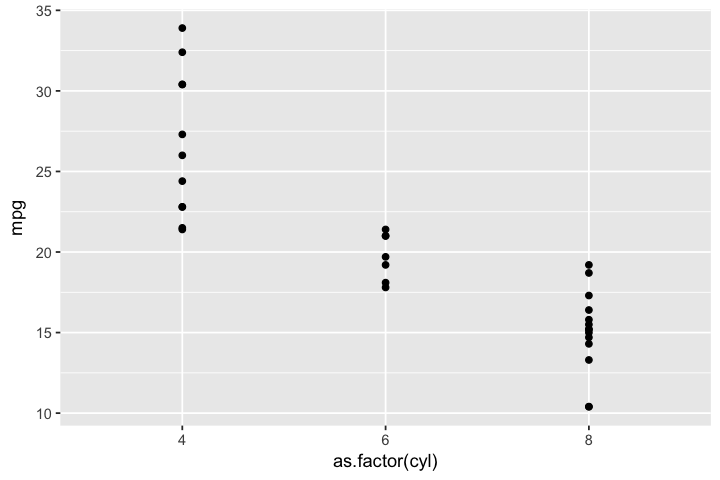

In [42]:
#intro ex 1,2
head(mtcars,3)
ggplot(mtcars, aes(x = as.factor(cyl), y = mpg)) +
  geom_point()

![](grammar.png)

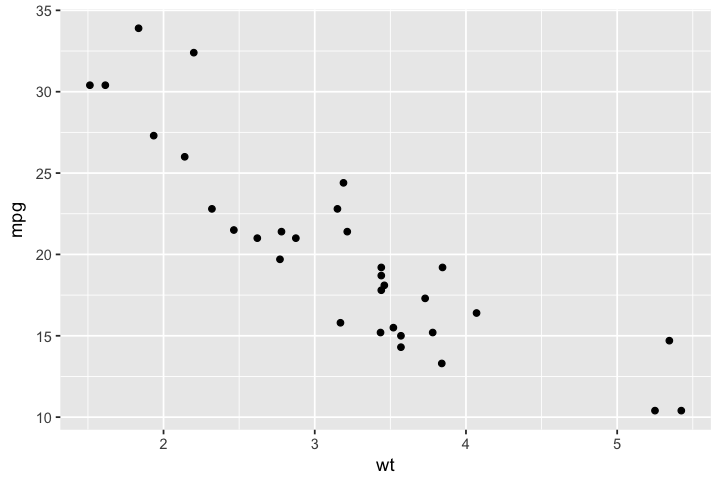

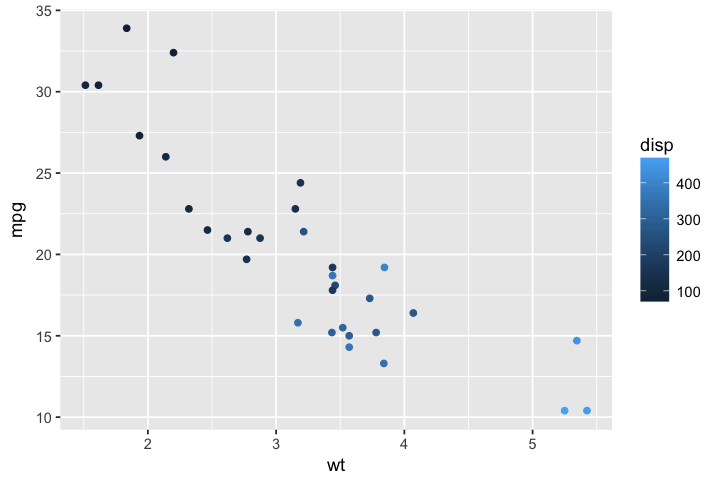

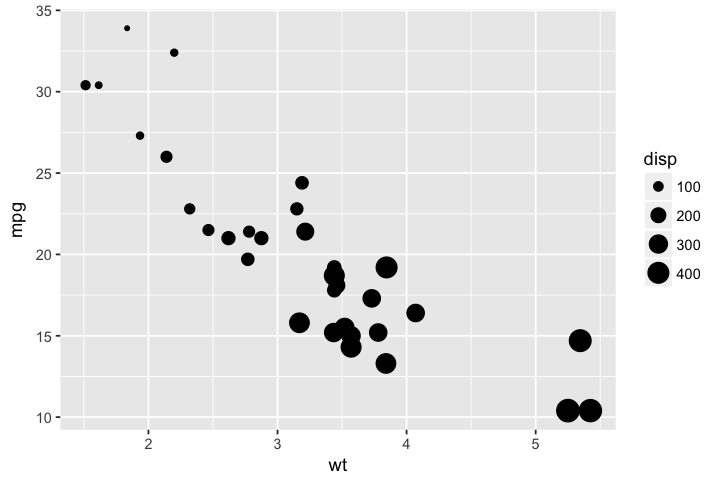

In [43]:
#intro ex 3
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()

# Replace ___ with the correct column
ggplot(mtcars, aes(x = wt, y = mpg, color = disp)) +
  geom_point()

# Replace ___ with the correct column
ggplot(mtcars, aes(x = wt, y = mpg, size = disp)) +
  geom_point()


carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31


`geom_smooth()` using method = 'gam'


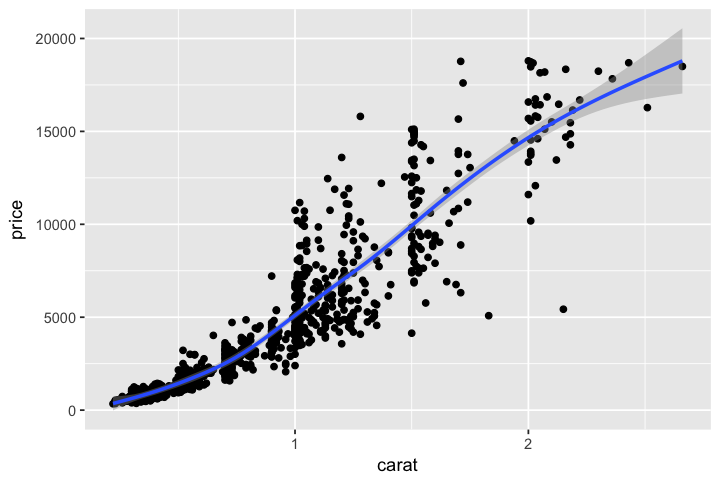

In [74]:
#intro ex 4
library(tidyverse)
head(diamonds,2)
#take a subset of diamands
set.seed(42)
idx<-sample(1:nrow(diamonds), size=1000) #1000 points
sdiamonds<-data.table(diamonds[idx,])

ggplot(sdiamonds, aes(x = carat, y = price)) +
geom_point()+
geom_smooth()

`geom_smooth()` using method = 'gam'


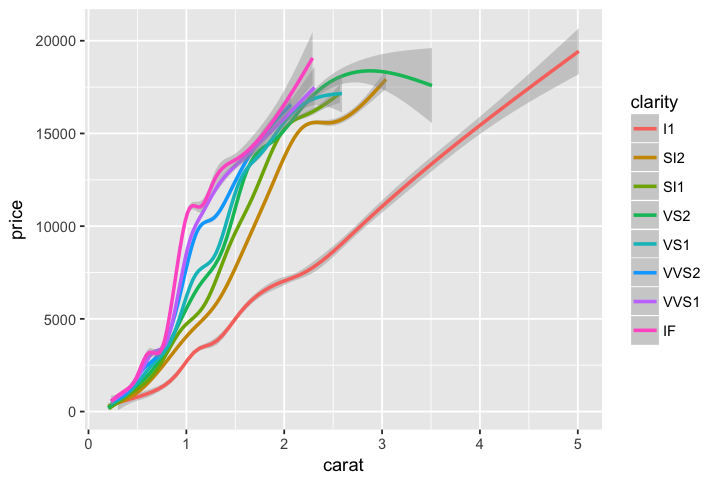

In [79]:
#showing only a smooth line

ggplot(diamonds,
  aes(x = carat, y = price,color=clarity)) +
  geom_smooth()


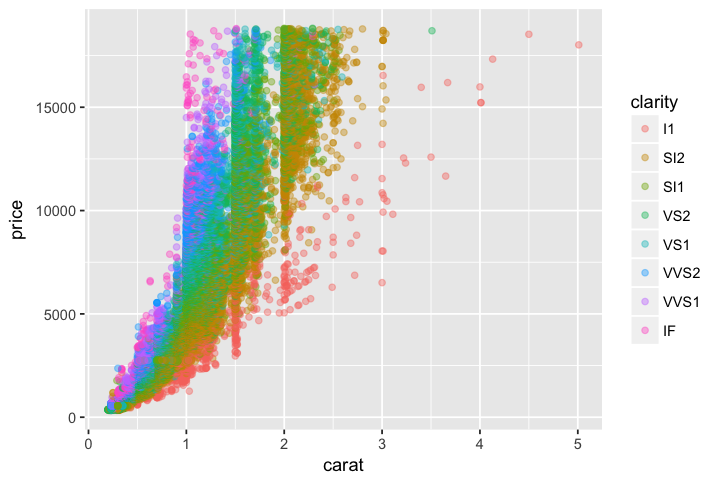

In [80]:
ggplot(diamonds,
  aes(x = carat, y = price,color=clarity)) +
  geom_point(alpha=0.4)

`geom_smooth()` using method = 'loess'


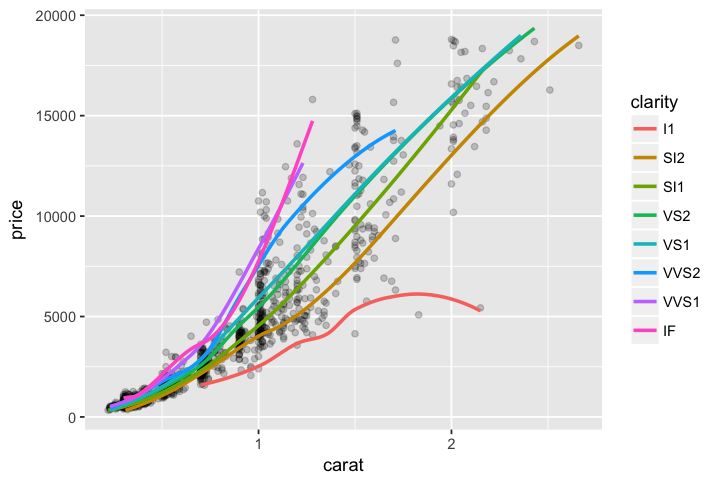

In [87]:
p <- ggplot(sdiamonds, aes(x = carat, y = price)) + 
     geom_point(alpha=0.2) +
     #particular mapping for smoothing
     geom_smooth(aes(col = clarity), se = FALSE)
print(p)

In [88]:
#ch Data
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [90]:
dim(iris)

[1] 150   5